In [69]:
import numpy as np 
import pandas as pd 

import tensorflow as tf

import os
import cv2

In [70]:
import matplotlib.pyplot as plt

In [71]:
def load_images(folder):
    all_images = []

    for species_name in os.listdir(folder):
        species_folder = os.path.join(folder, species_name)
        if not os.path.isdir(species_folder):
            continue

        for image_file in os.listdir(species_folder):
            image_path = os.path.join(species_folder, image_file)
            if not os.path.isfile(image_path):
                continue
            img = cv2.imread(image_path)
            all_images.append(img)

    return all_images

In [73]:
folder = './raw-img'
images = load_images(folder)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [82]:
def display_image(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

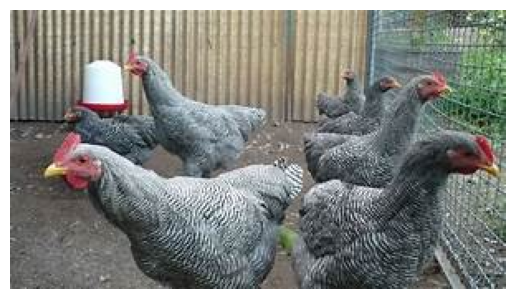

In [86]:
display_image(images[1])

https://www.kaggle.com/code/sreejapaul21/multiclass-classification

In [4]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

plt.rcParams['font.size'] = 14

In [6]:
!pwd

/Users/dipta/Documents/capstone/Model Training


In [8]:
batch_size = 32
img_size = 224
directory = './raw-img'

datagen = ImageDataGenerator(rescale = 1/255.,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            validation_split = 0.15)

train_generator = datagen.flow_from_directory(directory,
                                             target_size = (img_size, img_size),
                                             batch_size = batch_size,
                                             shuffle=True,
                                             subset='training',
                                             class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(directory,
                                             target_size = (img_size, img_size),
                                             batch_size = batch_size,
                                             shuffle=False,
                                             subset='validation',
                                             class_mode = 'categorical')

Found 22257 images belonging to 10 classes.
Found 3922 images belonging to 10 classes.


In [133]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", 
             "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", 
             "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", 
             "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", 
             "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}


In [134]:
# train_generator.__dict__
# train_generator.class_indices
labels = [key for key in train_generator.class_indices]

In [135]:
labels

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [136]:
list(map(translate.get, labels, labels))

['dog',
 'horse',
 'elephant',
 'butterfly',
 'chicken',
 'cat',
 'cow',
 'sheep',
 'ragno',
 'squirrel']

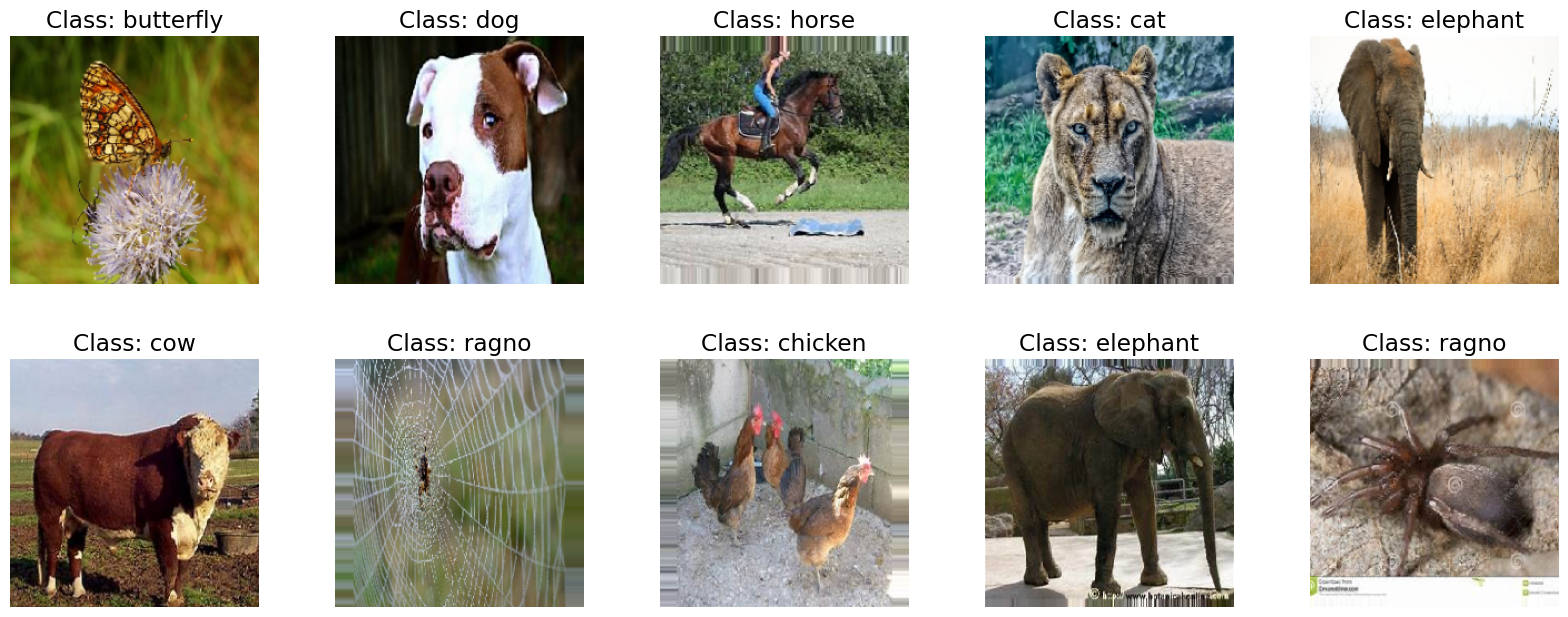

In [129]:
labels = [k for k in train_generator.class_indices]
labels = list(map(translate.get, labels, labels))
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))



for i in range(10):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [11]:
img_size = 224
base_model = VGG16(include_top = False,   # include_top is to include the classifier layer; whether to include the 3 fully-connected layers at the top of the network
                  weights = 'imagenet',
                  input_shape = (img_size, img_size, 3))

58889256/58889256 [==============================] - 16s 0us/step


In [12]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [14]:
model_name = 'baseline_model_vgg16.h5'
checkpoint = ModelCheckpoint(model_name,
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only = True,
                            verbose = 1)

earlystopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5, verbose = 1, restore_best_weights = True)

In [15]:
last_output = base_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(10, activation = 'softmax')(x)
model = Model(inputs = base_model.inputs, outputs = outputs)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator,
                   epochs = 3,
                   validation_data = validation_generator,
                   callbacks = [checkpoint, earlystopping])

Epoch 1/3


2023-06-25 00:20:27.142141: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


696/696 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.7745
Epoch 1: val_loss improved from inf to 0.37026, saving model to baseline_model_vgg16.h5
696/696 [==============================] - 151s 214ms/step - loss: 0.6814 - accuracy: 0.7745 - val_loss: 0.3703 - val_accuracy: 0.8748
Epoch 2/3
696/696 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8883
Epoch 2: val_loss improved from 0.37026 to 0.28630, saving model to baseline_model_vgg16.h5
696/696 [==============================] - 148s 213ms/step - loss: 0.3420 - accuracy: 0.8883 - val_loss: 0.2863 - val_accuracy: 0.9085
Epoch 3/3
696/696 [==============================] - ETA: 0s - loss: 0.2581 - accuracy: 0.9183
Epoch 3: val_loss improved from 0.28630 to 0.27266, saving model to baseline_model_vgg16.h5
696/696 [==============================] - 147s 211ms/step - loss: 0.2581 - accuracy: 0.9183 - val_loss: 0.2727 - val_accuracy: 0.9074


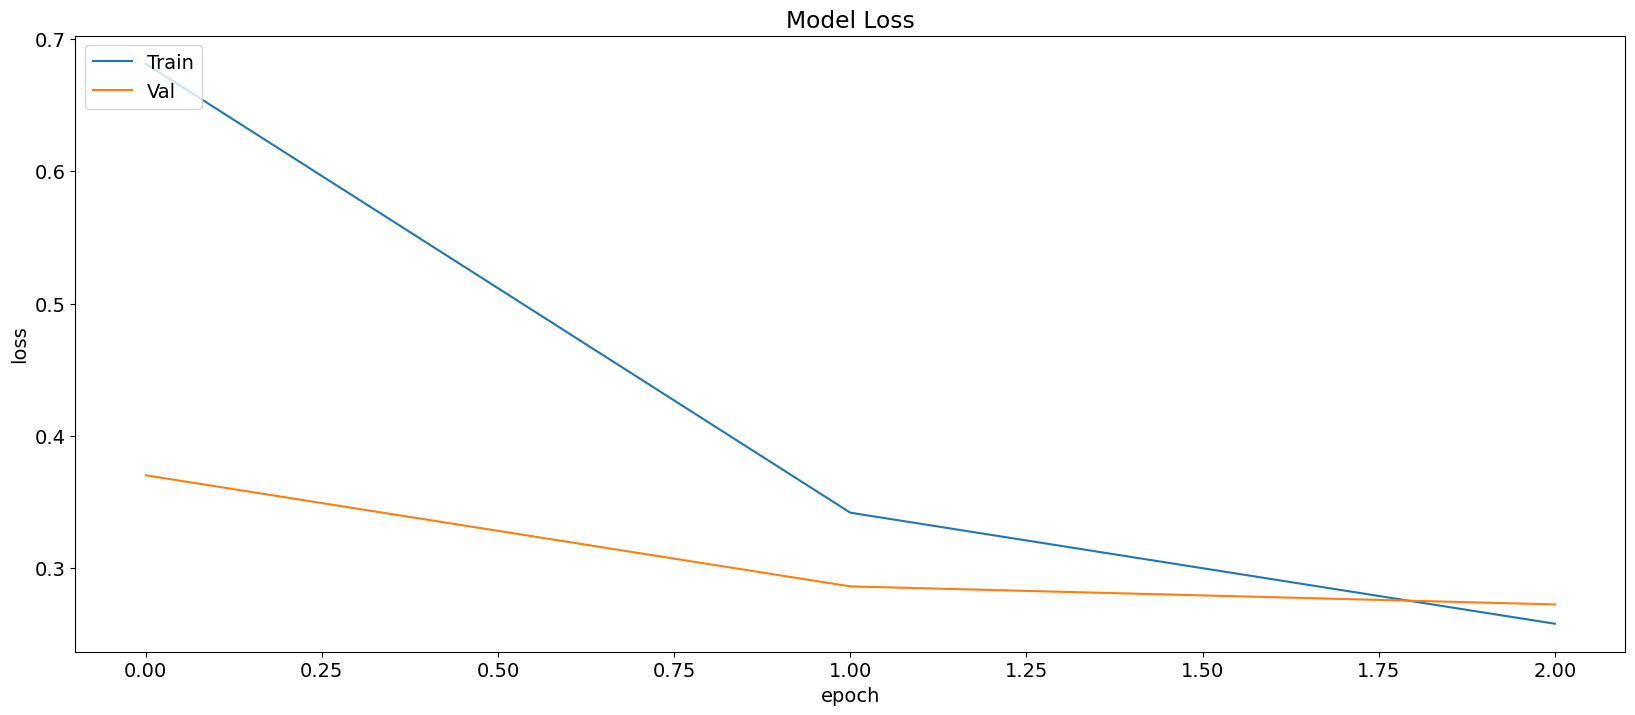

In [17]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

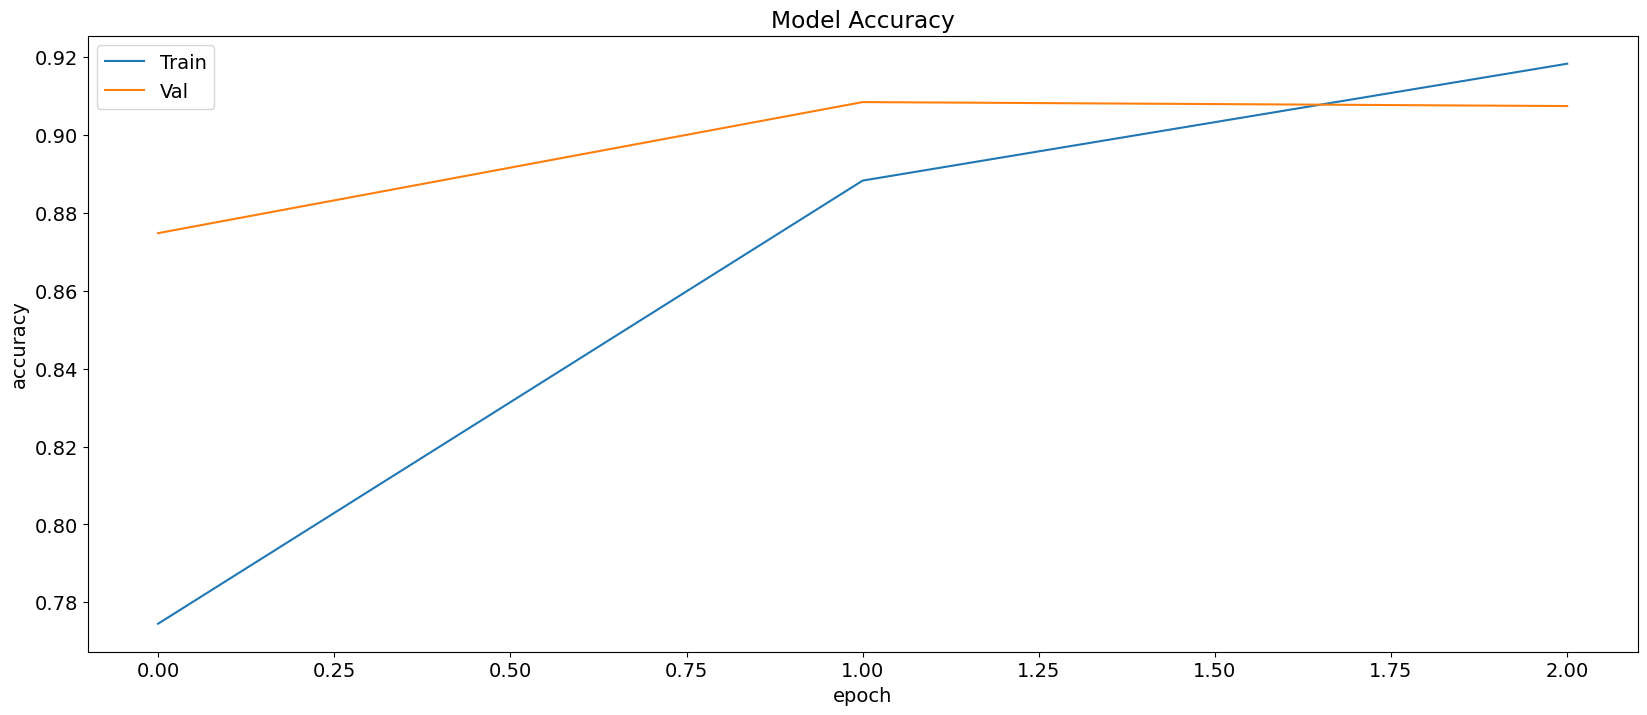

In [18]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
model = tf.keras.models.load_model('./baseline_model_vgg16.h5')

In [22]:
y_test = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_probs = y_pred.copy()

123/123 [==============================] - 18s 148ms/step


In [23]:
y_pred_int = np.argmax(y_pred_probs, axis=1)

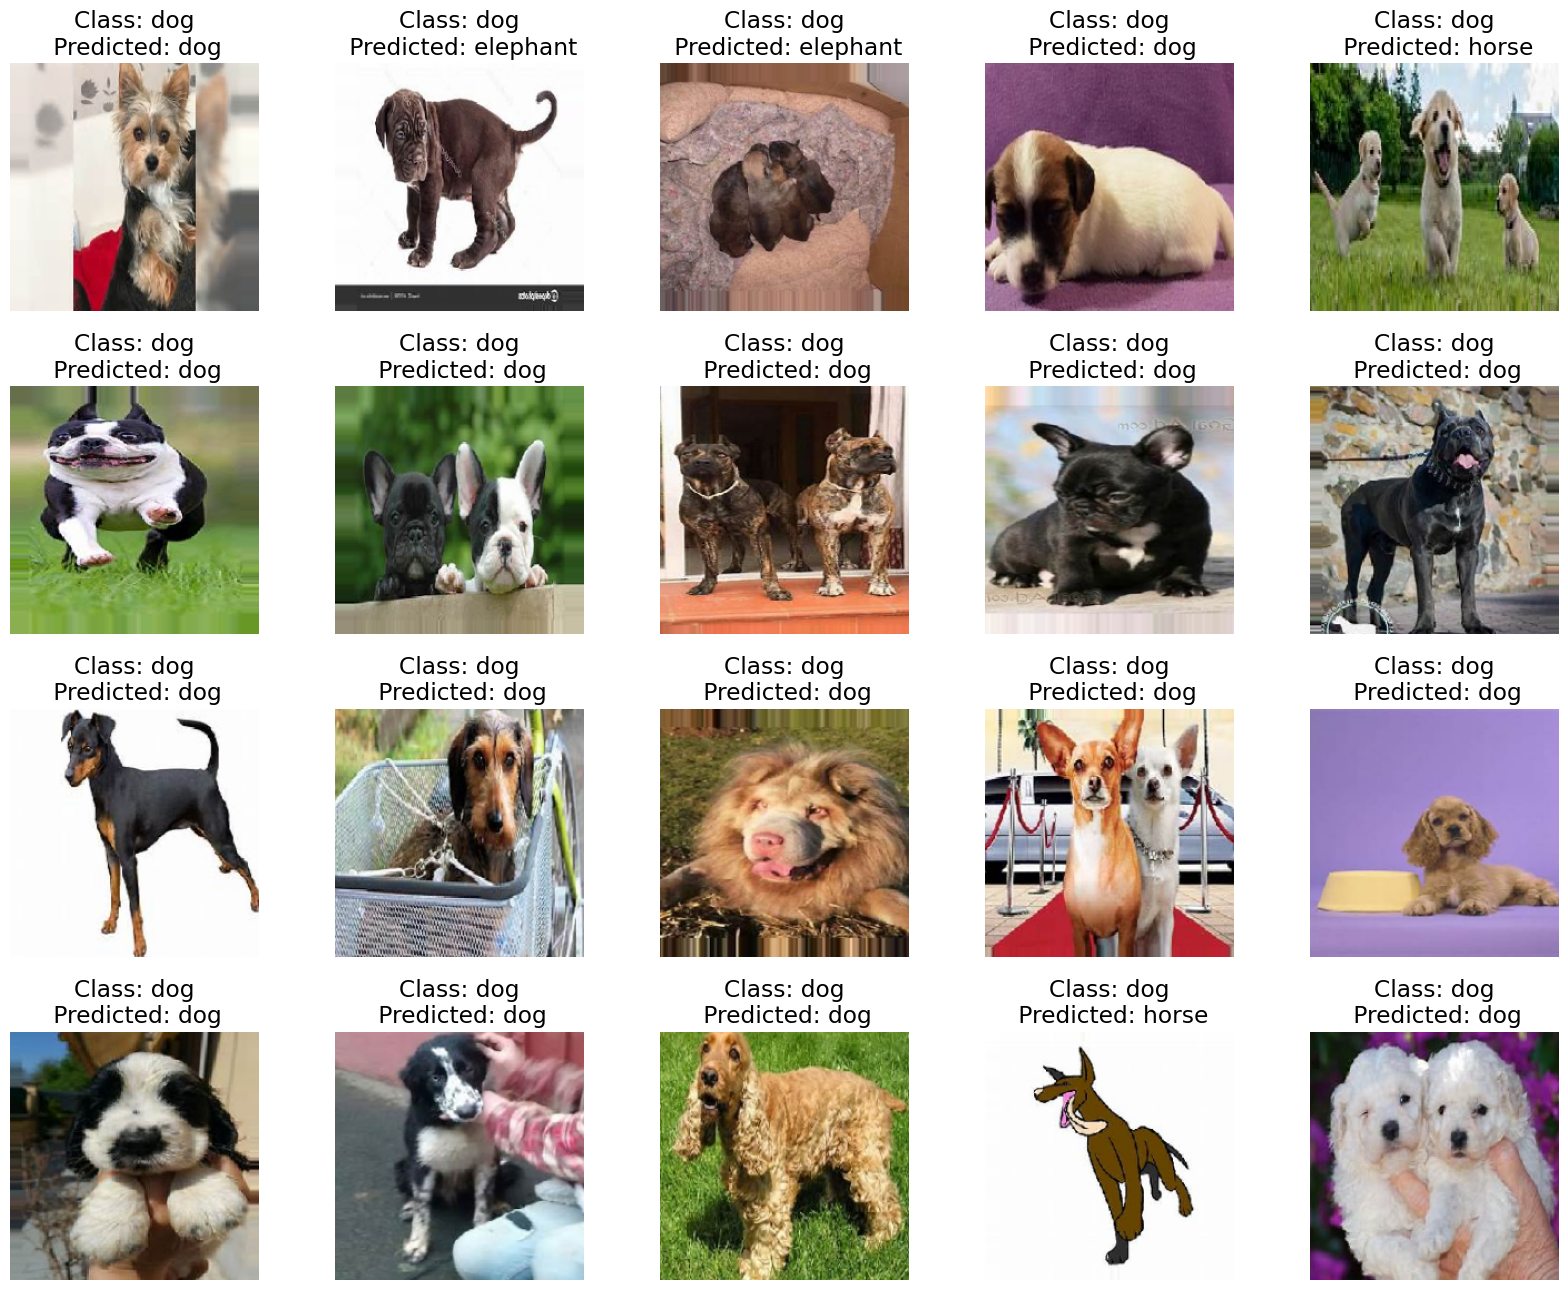

In [131]:
labels = [k for k in validation_generator.class_indices]
labels = list(map(translate.get, labels, labels))
sample_generate = validation_generator[0]
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))



for i in range(20):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}' +'\n'+
              f' Predicted: {labels[np.argmax(y_pred_probs[i],axis=0)]}')
    plt.axis("off")

In [24]:
print(classification_report(y_test,y_pred_int,target_names = labels))

              precision    recall  f1-score   support

        cane       0.90      0.90      0.90       729
     cavallo       0.82      0.94      0.88       393
    elefante       0.90      0.88      0.89       216
    farfalla       0.97      0.92      0.94       316
     gallina       0.87      0.96      0.91       464
       gatto       0.97      0.84      0.90       250
       mucca       0.94      0.79      0.86       279
      pecora       0.79      0.86      0.83       273
       ragno       0.98      0.95      0.96       723
  scoiattolo       0.90      0.84      0.87       279

    accuracy                           0.90      3922
   macro avg       0.90      0.89      0.89      3922
weighted avg       0.91      0.90      0.90      3922



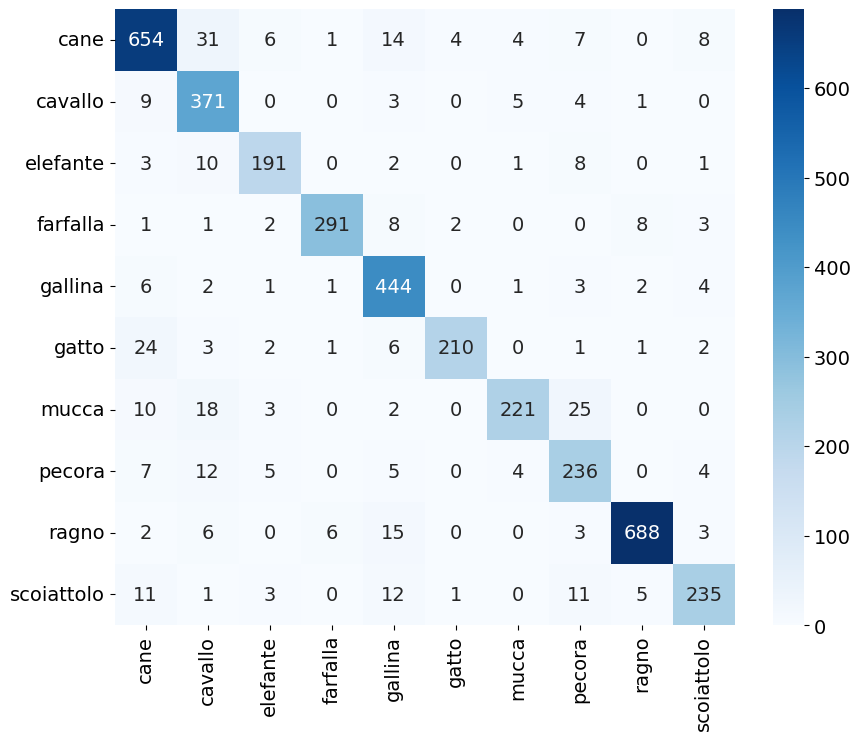

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred_int),annot=True,fmt='.3g',xticklabels=labels,
            yticklabels=labels,cmap='Blues')
plt.show()